# Ejercicio 1
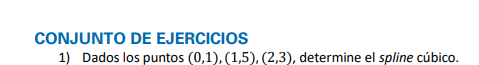

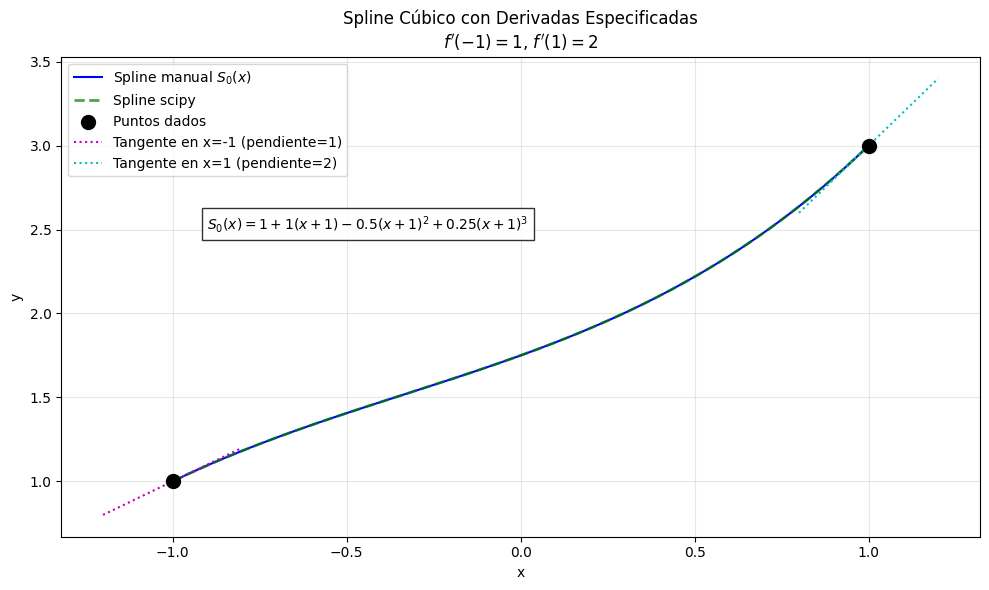


Coeficientes obtenidos:
S0(x) = 1.00 + 1.00(x+1) + -0.50(x+1)^2 + 0.25(x+1)^3

Ecuación final:
S0(x) = 1 + 1(x+1) - 0.5(x+1)^2 + 0.25(x+1)^3
      = 0.25x^3 + 0.25x^2 + 0.75x + 1.75  (forma expandida)

Verificación de condiciones:
S0(-1) = 1.0 (esperado: 1)
S0(1) = 3.0 (esperado: 3)
S0'(-1) = 1.0 (esperado: 1)
S0'(1) = 2.0 (esperado: 2)


In [3]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Datos del problema
x = np.array([-1, 1])
y = np.array([1, 3])
derivadas = [1, 2]  # f'(-1)=1, f'(1)=2

# 1. Spline con scipy (con condiciones de derivada)
cs = CubicSpline(x, y, bc_type=((1, derivadas[0]), (1, derivadas[1])))

# 2. Spline definido manualmente: S(x) = a + b(x+1) + c(x+1)^2 + d(x+1)^3
a0 = 1
b0 = 1
c0 = -0.5
d0 = 0.25

def S0(x_val):
    return a0 + b0 * (x_val + 1) + c0 * (x_val + 1)**2 + d0 * (x_val + 1)**3

def S0_prime(x_val):
    return b0 + 2 * c0 * (x_val + 1) + 3 * d0 * (x_val + 1)**2

# Puntos para graficar
x_vals = np.linspace(-1, 1, 200)

# Evaluaciones
y_manual = S0(x_vals)
y_scipy = cs(x_vals)

# Graficar spline
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_manual, 'b-', label='Spline manual $S_0(x)$')
plt.plot(x_vals, y_scipy, 'g--', label='Spline scipy', linewidth=2, alpha=0.7)
plt.scatter(x, y, color='black', zorder=5, s=100, label='Puntos dados')

# Agregar ecuación al gráfico
eq0 = r"$S_0(x) = 1 + 1(x+1) - 0.5(x+1)^2 + 0.25(x+1)^3$"
plt.text(-0.9, 2.5, eq0, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Líneas tangentes
x_tangent1 = np.linspace(-1.2, -0.8, 10)
y_tangent1 = y[0] + derivadas[0] * (x_tangent1 - x[0])
plt.plot(x_tangent1, y_tangent1, 'm:', label="Tangente en x=-1 (pendiente=1)")

x_tangent2 = np.linspace(0.8, 1.2, 10)
y_tangent2 = y[1] + derivadas[1] * (x_tangent2 - x[1])
plt.plot(x_tangent2, y_tangent2, 'c:', label="Tangente en x=1 (pendiente=2)")

# Configuración del gráfico
plt.title("Spline Cúbico con Derivadas Especificadas\n$f'(-1)=1$, $f'(1)=2$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar resultados
print("\nCoeficientes obtenidos:")
print(f"S0(x) = {a0:.2f} + {b0:.2f}(x+1) + {c0:.2f}(x+1)^2 + {d0:.2f}(x+1)^3")

print("\nEcuación final:")
print("S0(x) = 1 + 1(x+1) - 0.5(x+1)^2 + 0.25(x+1)^3")
print("      = 0.25x^3 + 0.25x^2 + 0.75x + 1.75  (forma expandida)")

print("\nVerificación de condiciones:")
print(f"S0(-1) = {S0(-1)} (esperado: 1)")
print(f"S0(1) = {S0(1)} (esperado: 3)")
print(f"S0'(-1) = {S0_prime(-1)} (esperado: 1)")
print(f"S0'(1) = {S0_prime(1)} (esperado: 2)")
